# ETF

In [6]:
import numpy as np
import pandas as pd
import cvxportfolio as cvx

Updating data.

YahooFinance("BIL") has dubious total open-to-open returns for timestamps: DatetimeIndex(['2014-02-24 14:30:00+00:00'], dtype='datetime64[ns, UTC]', freq=None)


................
back testing: [(0.0, 0.5), (0.0, 5), (0.0, 10), (0.0, 12), (0.1, 0.5), (0.1, 5), (0.1, 10), (0.1, 12), (0.2, 0.5), (0.2, 5), (0.2, 10), (0.2, 12), (0.3, 0.5), (0.3, 5), (0.3, 10), (0.3, 12), (0.4, 0.5), (0.4, 5), (0.4, 10), (0.4, 12), (0.5, 0.5), (0.5, 5), (0.5, 10), (0.5, 12), (0.6, 0.5), (0.6, 5), (0.6, 10), (0.6, 12), (0.7, 0.5), (0.7, 5), (0.7, 10), (0.7, 12), (0.8, 0.5), (0.8, 5), (0.8, 10), (0.8, 12), (0.9, 0.5), (0.9, 5), (0.9, 10), (0.9, 12)]
LARGEST SHARPE RATIO
gamma_trade and gamma_risk
(0.3, 0.5)
result

###########################################################
Universe size                                            18
Initial timestamp                       2019-06-03 13:30:00
Final timestamp                         2024-05-01 13:30:00
Number of periods                                        60
Initial value (USDOLLAR)                          1.000e+06
Final value (USDOLLAR)                            1.470e+06
Profit (USDOLLAR)                        

/Users/jacktang/miniconda3/envs/dev/lib/python3.11/site-packages/cvxportfolio/result.py:993: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show() # pragma: no cover


LARGEST GROWTH RATE
gamma_trade and gamma_risk
(0.4, 0.5)
result

###########################################################
Universe size                                            18
Initial timestamp                       2019-06-03 13:30:00
Final timestamp                         2024-05-01 13:30:00
Number of periods                                        60
Initial value (USDOLLAR)                          1.000e+06
Final value (USDOLLAR)                            1.470e+06
Profit (USDOLLAR)                                 4.696e+05
                                                           
Avg. return (annualized)                               9.4%
Volatility (annualized)                               17.3%
Avg. excess return (annualized)                        7.4%
Avg. active return (annualized)                        7.4%
Excess volatility (annualized)                        17.4%
Active volatility (annualized)                        17.4%
                                  

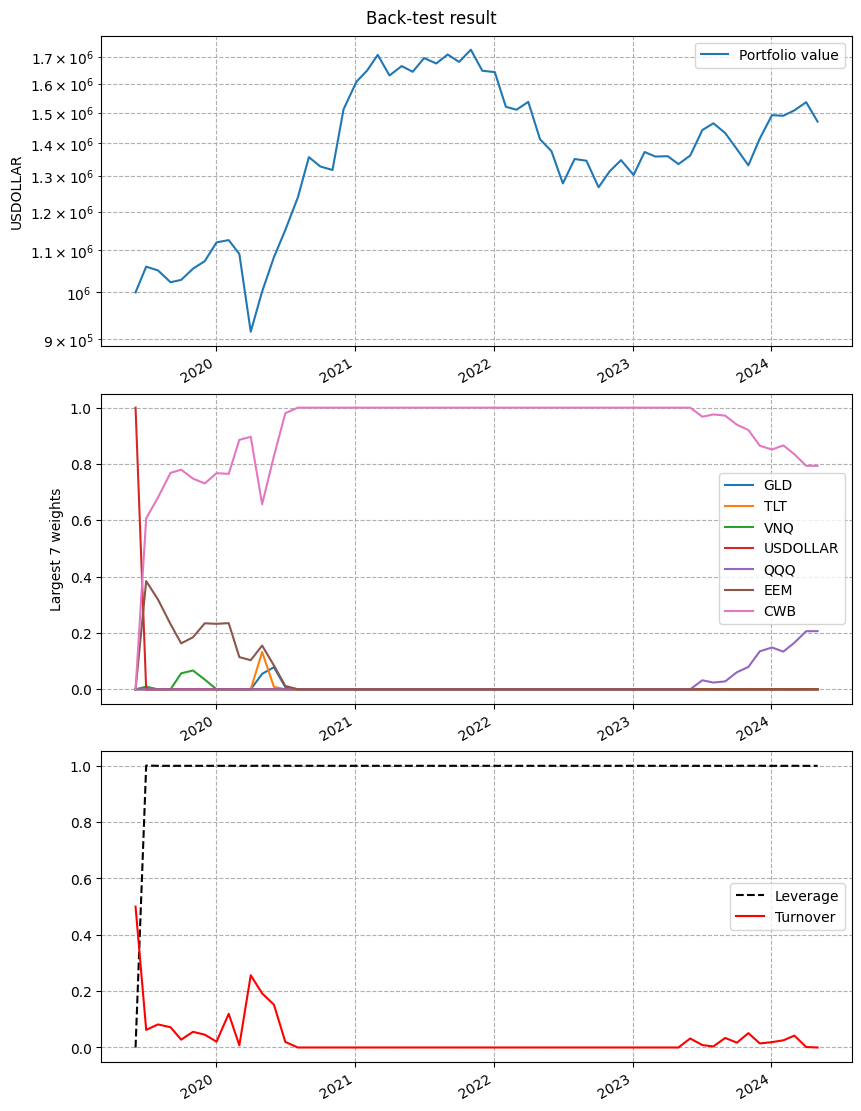

In [7]:
UNIVERSE = [
    "QQQ", # nasdaq 100
    "SPY", # US large caps
    'EFA', # EAFE stocks
    "CWB", # convertible bonds
    "IWM", # US small caps
    "EEM", # EM stocks
    "GLD", # Gold
    'TLT', # long duration treasuries
    'HYG', # high yield bonds
    "EMB", # EM bonds (usd)
    'LQD', # investment grade bonds
    'PFF', # preferred stocks
    'VNQ', # US REITs
    'BND', # US total bond market
    'BIL', # US cash
    'TIP', # TIPS
    'DBC', # commodities
    ]

sim = cvx.StockMarketSimulator(UNIVERSE, trading_frequency='monthly')

def make_policy(gamma_trade: float, gamma_risk: float):
    """Create policy object given hyper-parameter values.

    :param gamma_trade: Choice of the trading aversion multiplier.
    :type gamma_trade: float
    :param gamma_risk: Choice of the risk aversion multiplier.
    :type gamma_risk: float

    :returns: Policy object with given choices of hyper-parameters.
    :rtype: cvx.policies.Policy instance
    """
    return cvx.MultiPeriodOptimization(cvx.ReturnsForecast()
        - gamma_risk * cvx.FactorModelCovariance(num_factors=10)
        - gamma_trade * cvx.StocksTransactionCost(),
        [cvx.LongOnly(), cvx.LeverageLimit(1)],
        planning_horizon=6, solver='ECOS')

keys = [(gamma_trade, gamma_risk)
    for gamma_trade in np.array(range(10))/10
        for gamma_risk in [.5, 5, 10, 12]]
print("back testing:", keys)
ress = sim.backtest_many(
    [make_policy(*key) for key in keys], parallel=True, start_time=pd.Timestamp.today() - pd.Timedelta(f'{365.24*5}d'))

print('LARGEST SHARPE RATIO')
idx = np.argmax([el.sharpe_ratio for el in ress])

print('gamma_trade and gamma_risk')
print(keys[idx])

print('result')
print(ress[idx])

largest_sharpe_figure = ress[idx].plot()

print('LARGEST GROWTH RATE')
idx = np.argmax([el.growth_rates.mean() for el in ress])

print('gamma_trade and gamma_risk')
print(keys[idx])

print('result')
print(ress[idx])

/Users/jacktang/miniconda3/envs/dev/lib/python3.11/site-packages/cvxportfolio/result.py:993: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show() # pragma: no cover


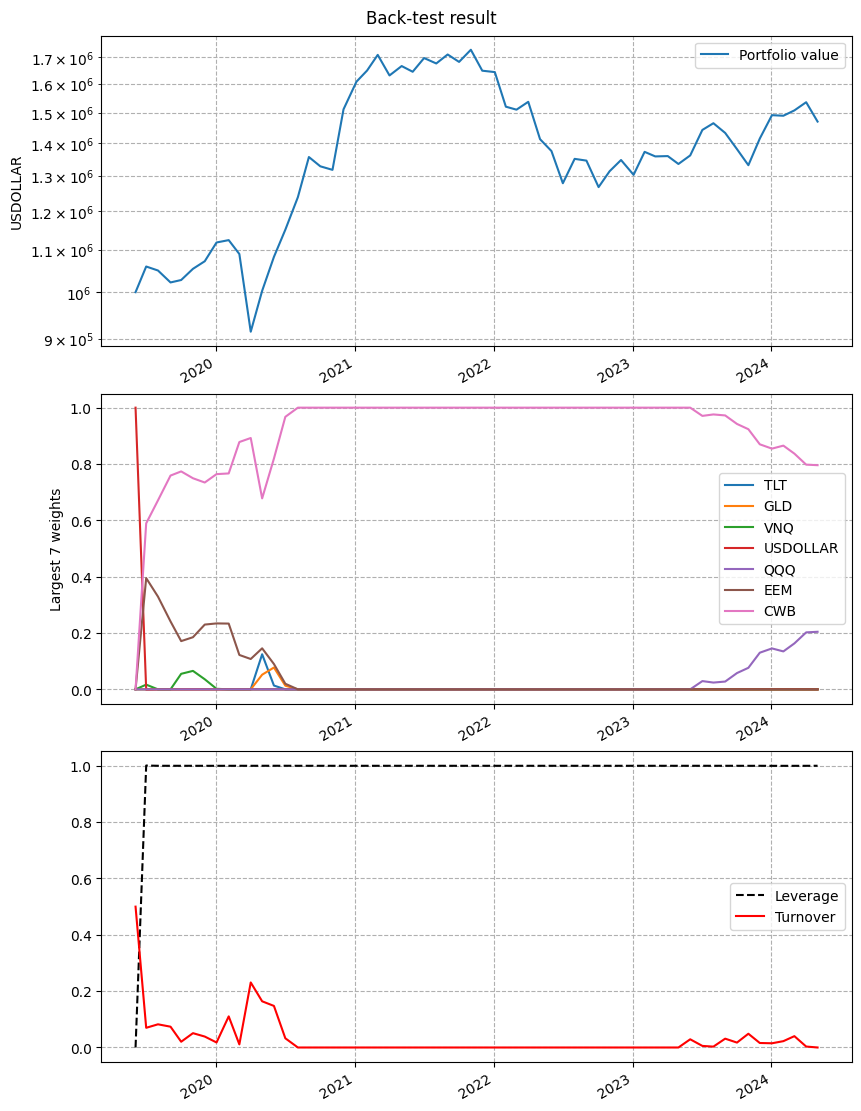

In [8]:
largest_growth_figure = ress[idx].plot()